•   sl_no = Serial Number
•   gender = Gender: Male='M', Female='F'
•   ssc_p = Secondary Education percentage- 10th Grade
•   ssc_b = Board of Education- Central/ Others
•   hsc_p = Higher Secondary Education percentage- 12th Grade
•   hsc_b = Board of Education- Central/ Others
•   hsc_s = Specialization in Higher Secondary Education
•   degree_p = Degree Percentage
•   degree_t = Under Graduation(Degree type)- Field of degree education
•   workex = Work Experience
•   etest_p = Employability test percentage ( conducted by college)
•   specialisation = Post Graduation(MBA)- Specialization
•   mba_p = MBA percentage
•   status = Status of placement- Placed/Not placed
•   salary = Salary offered by corporate to candidates

In [195]:
install.packages('Hmisc')
install.packages('gmodels')

Installing package into 'C:/Users/pmesquit/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Installing package into 'C:/Users/pmesquit/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'gmodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pmesquit\AppData\Local\Temp\RtmpOiKdnc\downloaded_packages


In [196]:
library('funModeling') 
library('tidyverse')
library('Hmisc')
library('dummies')
library('ROCR')
library('corrplot')
library('gmodels')

In [7]:
plac_class <- read.csv(('Placement_Data_Full_Class.csv'))

In [9]:
head(plac_class)

sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NA
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,NA


In [11]:
names(plac_class)

[1] "sl_no"          "gender"         "ssc_p"          "ssc_b"         
 [5] "hsc_p"          "hsc_b"          "hsc_s"          "degree_p"      
 [9] "degree_t"       "workex"         "etest_p"        "specialisation"
[13] "mba_p"          "status"         "salary"

In [12]:
str(plac_class)

'data.frame':	215 obs. of  15 variables:
 $ sl_no         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender        : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 1 2 2 2 ...
 $ ssc_p         : num  67 79.3 65 56 85.8 ...
 $ ssc_b         : Factor w/ 2 levels "Central","Others": 2 1 1 1 1 2 2 1 1 1 ...
 $ hsc_p         : num  91 78.3 68 52 73.6 ...
 $ hsc_b         : Factor w/ 2 levels "Central","Others": 2 2 1 1 1 2 2 1 1 1 ...
 $ hsc_s         : Factor w/ 3 levels "Arts","Commerce",..: 2 3 1 3 2 3 2 3 2 2 ...
 $ degree_p      : num  58 77.5 64 52 73.3 ...
 $ degree_t      : Factor w/ 3 levels "Comm&Mgmt","Others",..: 3 3 1 3 1 3 1 3 1 1 ...
 $ workex        : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ etest_p       : num  55 86.5 75 66 96.8 ...
 $ specialisation: Factor w/ 2 levels "Mkt&Fin","Mkt&HR": 2 1 1 2 1 1 1 1 1 1 ...
 $ mba_p         : num  58.8 66.3 57.8 59.4 55.5 ...
 $ status        : Factor w/ 2 levels "Not Placed","Placed": 2 2 2 1 2 1 1 2 2 1 ...
 $ salary        : int

In [13]:
summary(plac_class)

     sl_no       gender      ssc_p           ssc_b         hsc_p      
 Min.   :  1.0   F: 76   Min.   :40.89   Central:116   Min.   :37.00  
 1st Qu.: 54.5   M:139   1st Qu.:60.60   Others : 99   1st Qu.:60.90  
 Median :108.0           Median :67.00                 Median :65.00  
 Mean   :108.0           Mean   :67.30                 Mean   :66.33  
 3rd Qu.:161.5           3rd Qu.:75.70                 3rd Qu.:73.00  
 Max.   :215.0           Max.   :89.40                 Max.   :97.70  
                                                                      
     hsc_b          hsc_s        degree_p          degree_t   workex   
 Central: 84   Arts    : 11   Min.   :50.00   Comm&Mgmt:145   No :141  
 Others :131   Commerce:113   1st Qu.:61.00   Others   : 11   Yes: 74  
               Science : 91   Median :66.00   Sci&Tech : 59            
                              Mean   :66.37                            
                              3rd Qu.:72.00                            


In [16]:
library(ggvis)

Warning message:
"package 'ggvis' was built under R version 3.6.3"

In [18]:
plac_class %>% ggvis(~gender, ~ssc_p, fill = ~status) %>% layer_points()

In [21]:
plac_class %>% ggvis(~hsc_p, ~ssc_p, fill = ~status) %>% layer_points()

In [25]:
cor(plac_class$hsc_p, plac_class$ssc_p)

[1] 0.5114721

In [27]:
install.packages('class')
library(class)

Installing package into 'C:/Users/pmesquit/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'class' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pmesquit\AppData\Local\Temp\RtmpOiKdnc\downloaded_packages


Warning message:
"package 'class' was built under R version 3.6.3"

In [37]:
install.packages('dummies')
library('dummies')

Installing package into 'C:/Users/pmesquit/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'dummies' is in use and will not be installed"

In [203]:
plac_class = plac_class[,!names(plac_class) %in% 'sl_no']
plac_class = plac_class[,!names(plac_class) %in% 'salary']
plac_class[plac_class==''] <- NA

In [211]:
plac = subset(plac_class, select = c(2,4,7,10,12))
names(plac)

[1] "ssc_p"    "hsc_p"    "degree_p" "etest_p"  "mba_p"

In [262]:
categorical = c('gender','hsc_s','ssc_b','hsc_b','ssc_s','degree_t','workex','specialisation')
results <- fastDummies::dummy_cols(plac_class, select_columns = categorical)
res <- results[, !(names(results) %in% categorical)]

length(res)

[1] 22

In [212]:
options(warn = -1)
plac$gender = dummy(plac_class$gender)
plac$ssc_b = dummy(plac_class$ssc_b)
plac$hsc_b = dummy(plac_class$hsc_b)
plac$ssc_s = dummy(plac_class$hsc_s)
plac$degree_t = dummy(plac_class$degree_t)
plac$workex = dummy(plac_class$workex)
plac$specialisation = dummy(plac_class$specialisation)
plac$status = dummy(plac_class$status)

names(plac)
length(names(plac_class)) == length(names(plac))

[1] "ssc_p"          "hsc_p"          "degree_p"       "etest_p"       
 [5] "mba_p"          "gender"         "ssc_b"          "hsc_b"         
 [9] "ssc_s"          "degree_t"       "workex"         "specialisation"
[13] "status"

[1] TRUE

In [111]:
cor(plac)
res <- rcorr(as.matrix(plac))
res$P

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender.NAF,gender.NAM,ssc_b.NACentral,ssc_b.NAOthers,hsc_b.NACentral,...,ssc_s.NAScience,degree_t.NAComm&Mgmt,degree_t.NAOthers,degree_t.NASci&Tech,workex.NANo,workex.NAYes,specialisation.NAMkt&Fin,specialisation.NAMkt&HR,status.NANot Placed,status.NAPlaced
ssc_p,1.00000000,0.51147210,0.53840400,0.261992695,0.388477552,0.068968614,-0.068968614,-0.116194113,0.116194113,-0.066996092,...,0.189847157,-0.17958057,-0.066127312,0.221235225,-0.175675476,0.175675476,0.172536259,-0.172536259,-0.607888734,0.607888734
hsc_p,0.51147210,1.00000000,0.43420581,0.245112928,0.354822595,0.021333906,-0.021333906,0.137012913,-0.137012913,0.019548082,...,-0.226674668,0.11281583,-0.131382166,-0.053599398,-0.141024862,0.141024862,0.241629958,-0.241629958,-0.491227944,0.491227944
degree_p,0.53840400,0.43420581,1.00000000,0.224470171,0.402363771,0.173216618,-0.173216618,-0.038069911,0.038069911,-0.067229329,...,0.092006315,-0.03275480,-0.180408063,0.123476690,-0.122647554,0.122647554,0.218285935,-0.218285935,-0.479860993,0.479860993
etest_p,0.26199269,0.24511293,0.22447017,1.000000000,0.218054671,-0.084293518,0.084293518,0.018990806,-0.018990806,-0.039108032,...,0.055352408,-0.01253066,0.006907327,0.009748253,-0.056734693,0.056734693,0.236315103,-0.236315103,-0.127639375,0.127639375
mba_p,0.38847755,0.35482260,0.40236377,0.218054671,1.000000000,0.300531215,-0.300531215,-0.083120209,0.083120209,-0.090201303,...,0.048049710,-0.10208772,-0.036055268,0.125008726,-0.168811493,0.168811493,0.105727827,-0.105727827,-0.076921649,0.076921649
gender.NAF,0.06896861,0.02133391,0.17321662,-0.084293518,0.300531215,1.000000000,-1.000000000,0.019429113,-0.019429113,0.065944733,...,-0.042681550,0.03621463,0.093246004,-0.084072126,0.085152599,-0.085152599,-0.106159607,0.106159607,0.090670398,-0.090670398
gender.NAM,-0.06896861,-0.02133391,-0.17321662,0.084293518,-0.300531215,-1.000000000,1.000000000,-0.019429113,0.019429113,-0.065944733,...,0.042681550,-0.03621463,-0.093246004,0.084072126,-0.085152599,0.085152599,0.106159607,-0.106159607,-0.090670398,0.090670398
ssc_b.NACentral,-0.11619411,0.13701291,-0.03806991,0.018990806,-0.083120209,0.019429113,-0.019429113,1.000000000,-1.000000000,0.605883321,...,-0.058505420,0.09493891,0.002757846,-0.101060316,-0.040743924,0.040743924,-0.051564759,0.051564759,0.037296512,-0.037296512
ssc_b.NAOthers,0.11619411,-0.13701291,0.03806991,-0.018990806,0.083120209,-0.019429113,0.019429113,-1.000000000,1.000000000,-0.605883321,...,0.058505420,-0.09493891,-0.002757846,0.101060316,0.040743924,-0.040743924,0.051564759,-0.051564759,-0.037296512,0.037296512
hsc_b.NACentral,-0.06699609,0.01954808,-0.06722933,-0.039108032,-0.090201303,0.065944733,-0.065944733,0.605883321,-0.605883321,1.000000000,...,-0.126445729,0.02744035,0.116920164,-0.086547506,0.038356689,-0.038356689,0.002232093,-0.002232093,0.016944537,-0.016944537


,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender.NAF,gender.NAM,ssc_b.NACentral,ssc_b.NAOthers,hsc_b.NACentral,...,ssc_s.NAScience,degree_t.NAComm&Mgmt,degree_t.NAOthers,degree_t.NASci&Tech,workex.NANo,workex.NAYes,specialisation.NAMkt&Fin,specialisation.NAMkt&HR,status.NANot Placed,status.NAPlaced
ssc_p,NA,8.881784e-16,0.000000e+00,0.0001013688,3.719424e-09,3.141356e-01,3.141356e-01,0.08921192,0.08921192,0.32820896,...,0.005223408,8.307528e-03,3.345343e-01,0.001092344,9.851589e-03,9.851589e-03,0.0112716081,0.0112716081,0.000000e+00,0.000000e+00
hsc_p,8.881784e-16,NA,2.682210e-11,0.0002849401,8.922546e-08,7.557791e-01,7.557791e-01,0.04477460,0.04477460,0.77565376,...,0.000813930,9.897717e-02,5.441019e-02,0.434272091,3.881783e-02,3.881783e-02,0.0003496082,0.0003496082,1.865175e-14,1.865175e-14
degree_p,0.000000e+00,2.682210e-11,NA,0.0009177706,8.993304e-10,1.094938e-02,1.094938e-02,0.57878411,0.57878411,0.32652403,...,0.178927221,6.329293e-01,8.009394e-03,0.070779454,7.270725e-02,7.270725e-02,0.0012775631,0.0012775631,8.792966e-14,8.792966e-14
etest_p,1.013688e-04,2.849401e-04,9.177706e-04,NA,1.293240e-03,2.183332e-01,2.183332e-01,0.78188642,0.78188642,0.56846633,...,0.419370688,8.550557e-01,9.197949e-01,0.886995044,4.078340e-01,4.078340e-01,0.0004749760,0.0004749760,6.172038e-02,6.172038e-02
mba_p,3.719424e-09,8.922546e-08,8.993304e-10,0.0012932400,NA,7.288608e-06,7.288608e-06,0.22483248,0.22483248,0.18764161,...,0.483399880,1.356796e-01,5.990528e-01,0.067326942,1.318816e-02,1.318816e-02,0.1222079867,0.1222079867,2.614450e-01,2.614450e-01
gender.NAF,3.141356e-01,7.557791e-01,1.094938e-02,0.2183332019,7.288608e-06,NA,0.000000e+00,0.77698313,0.77698313,0.33587345,...,0.533633013,5.974380e-01,1.731177e-01,0.219549176,2.136603e-01,2.136603e-01,0.1206814361,0.1206814361,1.853475e-01,1.853475e-01
gender.NAM,3.141356e-01,7.557791e-01,1.094938e-02,0.2183332019,7.288608e-06,0.000000e+00,NA,0.77698313,0.77698313,0.33587345,...,0.533633013,5.974380e-01,1.731177e-01,0.219549176,2.136603e-01,2.136603e-01,0.1206814361,0.1206814361,1.853475e-01,1.853475e-01
ssc_b.NACentral,8.921192e-02,4.477460e-02,5.787841e-01,0.7818864213,2.248325e-01,7.769831e-01,7.769831e-01,NA,0.00000000,0.00000000,...,0.393333116,1.654120e-01,9.679318e-01,0.139680841,5.523869e-01,5.523869e-01,0.4519423992,0.4519423992,5.865272e-01,5.865272e-01
ssc_b.NAOthers,8.921192e-02,4.477460e-02,5.787841e-01,0.7818864213,2.248325e-01,7.769831e-01,7.769831e-01,0.00000000,NA,0.00000000,...,0.393333116,1.654120e-01,9.679318e-01,0.139680841,5.523869e-01,5.523869e-01,0.4519423992,0.4519423992,5.865272e-01,5.865272e-01
hsc_b.NACentral,3.282090e-01,7.756538e-01,3.265240e-01,0.5684663271,1.876416e-01,3.358735e-01,3.358735e-01,0.00000000,0.00000000,NA,...,0.064214870,6.890944e-01,8.721730e-02,0.206226171,5.759251e-01,5.759251e-01,0.9740428902,0.9740428902,8.048888e-01,8.048888e-01


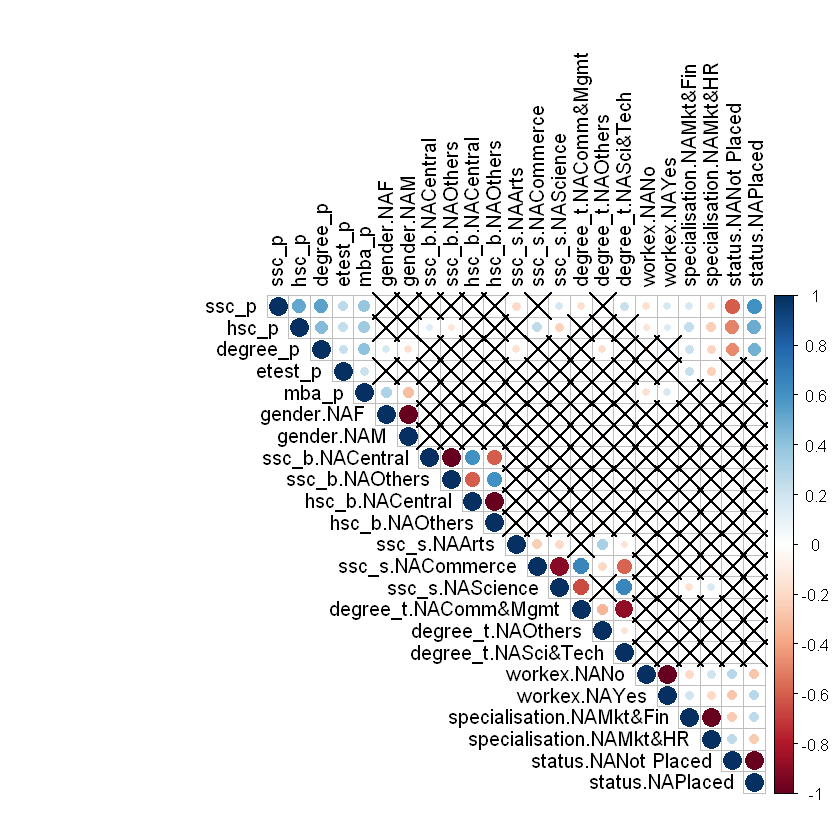

In [148]:
corrplot(cor(plac), type = 'upper', method = 'circle',  tl.col = 'black',  p.mat = res$P, sig.leve = 0.05)

In [236]:
# Build your own `normalize()` function
normalize <- function(x) {
num <- x - min(x)
denom <- max(x) - min(x)
return (num/denom)
}

# Normalize the `iris` data
plac_norm <- as.data.frame(lapply(plac, normalize))

# Summarize `iris_norm`
plac2 <- as.data.frame(lapply(plac,mean))
str(plac)

'data.frame':	215 obs. of  13 variables:
 $ ssc_p         : num  67 79.3 65 56 85.8 ...
 $ hsc_p         : num  91 78.3 68 52 73.6 ...
 $ degree_p      : num  58 77.5 64 52 73.3 ...
 $ etest_p       : num  55 86.5 75 66 96.8 ...
 $ mba_p         : num  58.8 66.3 57.8 59.4 55.5 ...
 $ gender        : int [1:215, 1:2] 0 0 0 0 0 0 1 0 0 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr  "NAF" "NAM"
 $ ssc_b         : int [1:215, 1:2] 0 1 1 1 1 0 0 1 1 1 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr  "NACentral" "NAOthers"
 $ hsc_b         : int [1:215, 1:2] 0 0 1 1 1 0 0 1 1 1 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr  "NACentral" "NAOthers"
 $ ssc_s         : int [1:215, 1:3] 0 0 1 0 0 0 0 0 0 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr  "NAArts" "NACommerce" "NAScience"
 $ degree_t      : int [1:215, 1:3] 0 0 1 0 1 0 1 0 1 1 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  

In [157]:
set.seed(1234)
length(names(plac))

[1] 13

In [277]:
ind <- sample(2, nrow(plac), replace=TRUE, prob=c(0.67, 0.33))

plac.training <- plac_norm[ind == 1, 1:12]
plac.test <- plac_norm[ind == 2, 1:12]


In [278]:
plac.trainLabels <- plac_class[ind==1,13]
plac.testLabels <- plac_class[ind==2,13]

In [280]:
# Build the model
plac_pred <- knn(plac.training, plac.test, plac.trainLabels, k=9)

# Inspect `iris_pred`
plac_pred

[1] Placed     Placed     Placed     Placed     Placed     Placed    
 [7] Placed     Not Placed Not Placed Placed     Placed     Not Placed
[13] Not Placed Placed     Placed     Placed     Placed     Placed    
[19] Placed     Placed     Placed     Placed     Placed     Placed    
[25] Placed     Placed     Placed     Placed     Not Placed Placed    
[31] Placed     Placed     Not Placed Not Placed Placed     Placed    
[37] Placed     Placed     Placed     Placed     Placed     Placed    
[43] Placed     Placed     Placed     Placed     Placed     Placed    
[49] Placed     Placed     Placed     Placed     Placed     Placed    
[55] Placed     Placed     Not Placed Not Placed Not Placed Placed    
[61] Placed     Placed     Not Placed Placed     Placed     Placed    
[67] Placed     Placed     Placed     Placed     Placed    
Levels: Not Placed Placed

In [281]:
# Put `iris.testLabels` in a data frame
placTestLabels <- data.frame(plac.testLabels)

# Merge `iris_pred` and `iris.testLabels` 
merge <- data.frame(plac_pred, plac.testLabels)

# Specify column names for `merge`
names(merge) <- c("Predicted Placement", "Observed Placement")

# Inspect `merge` 
merge

Predicted Placement,Observed Placement
Placed,Placed
Placed,Placed
Placed,Not Placed
Placed,Placed
Placed,Not Placed
Placed,Placed
Placed,Not Placed
Not Placed,Placed
Not Placed,Not Placed
Placed,Placed


In [282]:
CrossTable(x = plac.testLabels, y = plac_pred, prop.chisq=FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  71 

 
                | plac_pred 
plac.testLabels | Not Placed |     Placed |  Row Total | 
----------------|------------|------------|------------|
     Not Placed |         10 |         12 |         22 | 
                |      0.455 |      0.545 |      0.310 | 
                |      0.909 |      0.200 |            | 
                |      0.141 |      0.169 |            | 
----------------|------------|------------|------------|
         Placed |          1 |         48 |         49 | 
                |      0.020 |      0.980 |      0.690 | 
                |      0.091 |      0.800 |            | 
                |      0.014 |      0.676 |            | 
----------------|------------|------------|------------|
   Column Total |         11 |         60 |       

In [198]:
install.packages('caret')

Installing package into 'C:/Users/pmesquit/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'ModelMetrics', 'recipes', 'pROC'



package 'ModelMetrics' successfully unpacked and MD5 sums checked
package 'recipes' successfully unpacked and MD5 sums checked
package 'pROC' successfully unpacked and MD5 sums checked
package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pmesquit\AppData\Local\Temp\RtmpOiKdnc\downloaded_packages


In [222]:
library(caret)
summary(plac)

     ssc_p           hsc_p          degree_p        etest_p         mba_p      
 Min.   :40.89   Min.   :37.00   Min.   :50.00   Min.   :50.0   Min.   :51.21  
 1st Qu.:60.60   1st Qu.:60.90   1st Qu.:61.00   1st Qu.:60.0   1st Qu.:57.95  
 Median :67.00   Median :65.00   Median :66.00   Median :71.0   Median :62.00  
 Mean   :67.30   Mean   :66.33   Mean   :66.37   Mean   :72.1   Mean   :62.28  
 3rd Qu.:75.70   3rd Qu.:73.00   3rd Qu.:72.00   3rd Qu.:83.5   3rd Qu.:66.25  
 Max.   :89.40   Max.   :97.70   Max.   :91.00   Max.   :98.0   Max.   :77.89  
     gender.NAF           gender.NAM     
 Min.   :0.0000000    Min.   :0.0000000  
 1st Qu.:0.0000000    1st Qu.:0.0000000  
 Median :0.0000000    Median :1.0000000  
 Mean   :0.3534884    Mean   :0.6465116  
 3rd Qu.:1.0000000    3rd Qu.:1.0000000  
 Max.   :1.0000000    Max.   :1.0000000  
   ssc_b.NACentral      ssc_b.NAOthers   
 Min.   :0.0000000    Min.   :0.0000000  
 1st Qu.:0.0000000    1st Qu.:0.0000000  
 Median :1.0000000  

In [270]:
# Create index to split based on labels  
index <- createDataPartition(res$status, p=0.75, list=FALSE)

# Subset training set with index
plac.training <- res[index,]

# Subset test set with index
plac.test <- res[-index,]
res[6]

status
Placed
Placed
Placed
Not Placed
Placed
Not Placed
Not Placed
Placed
Placed
Not Placed


In [273]:
# Overview of algos supported by caret
names(getModelInfo())

# Train a model
model_knn <- train(plac.training[, c(1:5,7:22)], plac.training[, 6], method='knn')

model_knn

[1] "ada"                 "AdaBag"              "AdaBoost.M1"        
  [4] "adaboost"            "amdai"               "ANFIS"              
  [7] "avNNet"              "awnb"                "awtan"              
 [10] "bag"                 "bagEarth"            "bagEarthGCV"        
 [13] "bagFDA"              "bagFDAGCV"           "bam"                
 [16] "bartMachine"         "bayesglm"            "binda"              
 [19] "blackboost"          "blasso"              "blassoAveraged"     
 [22] "bridge"              "brnn"                "BstLm"              
 [25] "bstSm"               "bstTree"             "C5.0"               
 [28] "C5.0Cost"            "C5.0Rules"           "C5.0Tree"           
 [31] "cforest"             "chaid"               "CSimca"             
 [34] "ctree"               "ctree2"              "cubist"             
 [37] "dda"                 "deepboost"           "DENFIS"             
 [40] "dnn"                 "dwdLinear"           "dwdPoly"            
 [43] "dwdRadial"           "earth"               "elm"                
 [46] "enet"                "evtree"              "extraTrees"         
 [49] "fda"                 "FH.GBML"             "FIR.DM"             
 [52] "foba"                "FRBCS.CHI"           "FRBCS.W"            
 [55] "FS.HGD"              "gam"                 "gamboost"           
 [58] "gamLoess"            "gamSpline"           "gaussprLinear"      
 [61] "gaussprPoly"         "gaussprRadial"       "gbm_h2o"            
 [64] "gbm"                 "gcvEarth"            "GFS.FR.MOGUL"       
 [67] "GFS.LT.RS"           "GFS.THRIFT"          "glm.nb"             
 [70] "glm"                 "glmboost"            "glmnet_h2o"         
 [73] "glmnet"              "glmStepAIC"          "gpls"               
 [76] "hda"                 "hdda"                "hdrda"              
 [79] "HYFIS"               "icr"                 "J48"                
 [82] "JRip"                "kernelpls"           "kknn"               
 [85] "knn"                 "krlsPoly"            "krlsRadial"         
 [88] "lars"                "lars2"               "lasso"              
 [91] "lda"                 "lda2"                "leapBackward"       
 [94] "leapForward"         "leapSeq"             "Linda"              
 [97] "lm"                  "lmStepAIC"           "LMT"                
[100] "loclda"              "logicBag"            "LogitBoost"         
[103] "logreg"              "lssvmLinear"         "lssvmPoly"          
[106] "lssvmRadial"         "lvq"                 "M5"                 
[109] "M5Rules"             "manb"                "mda"                
[112] "Mlda"                "mlp"                 "mlpKerasDecay"      
[115] "mlpKerasDecayCost"   "mlpKerasDropout"     "mlpKerasDropoutCost"
[118] "mlpML"               "mlpSGD"              "mlpWeightDecay"     
[121] "mlpWeightDecayML"    "monmlp"              "msaenet"            
[124] "multinom"            "mxnet"               "mxnetAdam"          
[127] "naive_bayes"         "nb"                  "nbDiscrete"         
[130] "nbSearch"            "neuralnet"           "nnet"               
[133] "nnls"                "nodeHarvest"         "null"               
[136] "OneR"                "ordinalNet"          "ordinalRF"          
[139] "ORFlog"              "ORFpls"              "ORFridge"           
[142] "ORFsvm"              "ownn"                "pam"                
[145] "parRF"               "PART"                "partDSA"            
[148] "pcaNNet"             "pcr"                 "pda"                
[151] "pda2"                "penalized"           "PenalizedLDA"       
[154] "plr"                 "pls"                 "plsRglm"            
[157] "polr"                "ppr"                 "PRIM"               
[160] "protoclass"          "qda"                 "QdaCov"             
[163] "qrf"                 "qrnn"                "randomGLM"          
[166] "ranger"              "rbf"         

k-Nearest Neighbors 

162 samples
 21 predictor
  2 classes: 'Not Placed', 'Placed' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 162, 162, 162, 162, 162, 162, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.7613838  0.4158929
  7  0.7669368  0.4235639
  9  0.7762637  0.4340884

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

In [274]:
model_cart <- train(plac.training[, c(1:5,7:22)], plac.training[, 6], method='rpart2')

model_cart

CART 

162 samples
 21 predictor
  2 classes: 'Not Placed', 'Placed' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 162, 162, 162, 162, 162, 162, ... 
Resampling results across tuning parameters:

  maxdepth  Accuracy   Kappa    
  1         0.7821872  0.4667034
  4         0.7809903  0.4748089
  6         0.7776338  0.4706055

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was maxdepth = 1.